<a href="https://colab.research.google.com/github/mehtasaurav/Drift-Detection-and-Adaptation-VIT-University/blob/main/Start.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
import pandas as pd
# Upload the dataset file
uploaded = files.upload()
# Get the file name
file_name = next(iter(uploaded))
# Load the dataset into a Pandas DataFrame
df = pd.read_csv(file_name)
# Print the shape and features of the dataset
print(df.shape)
print(df.columns)


Saving IoT_2020_b_0.01_fs.csv to IoT_2020_b_0.01_fs.csv
(6252, 32)
Index(['Flow_ID', 'Src_IP', 'Src_Port', 'Dst_IP', 'Dst_Port', 'Timestamp',
       'Flow_Duration', 'TotLen_Fwd_Pkts', 'TotLen_Bwd_Pkts',
       'Bwd_Pkt_Len_Max', 'Flow_Byts/s', 'Flow_Pkts/s', 'Flow_IAT_Mean',
       'Flow_IAT_Std', 'Flow_IAT_Max', 'Flow_IAT_Min', 'Fwd_IAT_Tot',
       'Bwd_IAT_Tot', 'Bwd_IAT_Mean', 'Bwd_IAT_Std', 'Bwd_IAT_Max',
       'Bwd_Header_Len', 'Fwd_Pkts/s', 'Bwd_Pkts/s', 'Pkt_Len_Std',
       'FIN_Flag_Cnt', 'Pkt_Size_Avg', 'Init_Bwd_Win_Byts', 'Idle_Mean',
       'Idle_Max', 'Idle_Min', 'Label'],
      dtype='object')


In [14]:
cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [19]:
%run Import_libraries.ipynb
%run Load_split_dataset.ipynb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Random Forest Classifier selected...
Accuracy: 100.0 %
Total time taken to predict the labels of the test set: 0.021288633346557617
Making Graph Please Wait...


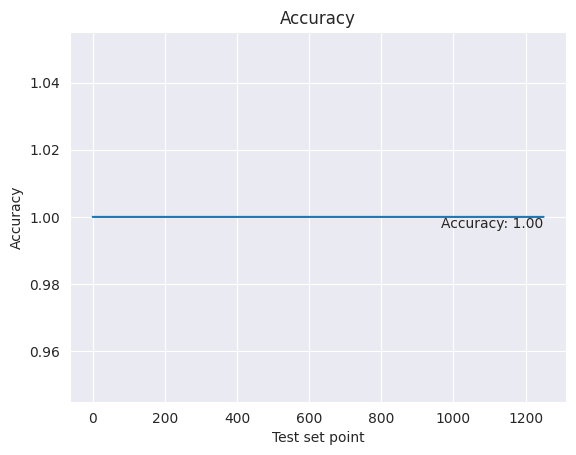

In [20]:
import ipywidgets as widgets
from IPython.display import display

# Create a button for Random Forest Classifier
random_forest_button = widgets.Button(description="Random Forest Classifier", button_style="success", layout=widgets.Layout(width='200px', height='50px'))
# Create a button for XGBoost Classifier
xgboost_button = widgets.Button(description="XGBoost Classifier", button_style="info", layout=widgets.Layout(width='200px', height='50px'))

# Arrange the buttons horizontally
buttons_layout = widgets.Layout(display='flex', flex_flow='row', justify_content='center')

# Create an HBox to hold the buttons
buttons_container = widgets.HBox([random_forest_button, xgboost_button], layout=buttons_layout)

# Function to handle the button clicks
def on_button_click(button):
    if button.description == "Random Forest Classifier":
        # Call the function for Random Forest Classifier
        random_forest_classifier()
    elif button.description == "XGBoost Classifier":
        # Call the function for XGBoost Classifier
        xgboost_classifier()

# Function for Random Forest Classifier
def random_forest_classifier():
    # Implement the logic for Random Forest Classifier
    print("Random Forest Classifier selected...")
    %run Random_Forest_Classifier.ipynb

# Function for XGBoost Classifier
def xgboost_classifier():
    # Implement the logic for XGBoost Classifier
    print("XGBoost Classifier selected...")
    %run XGBoost_Classifier.ipynb

# Assign the button click event handler
random_forest_button.on_click(on_button_click)
xgboost_button.on_click(on_button_click)

# Display the buttons container
display(buttons_container)


Checking drift...


Checking drift:   0%|          | 0/10

p-value: 0.0
Data drift detected
Process Completed


Inducing drift with 40%...
Accuracy (Original Test Set): 99.6802557953637 %
Accuracy (Noisy Test Set): 97.20223820943245 %


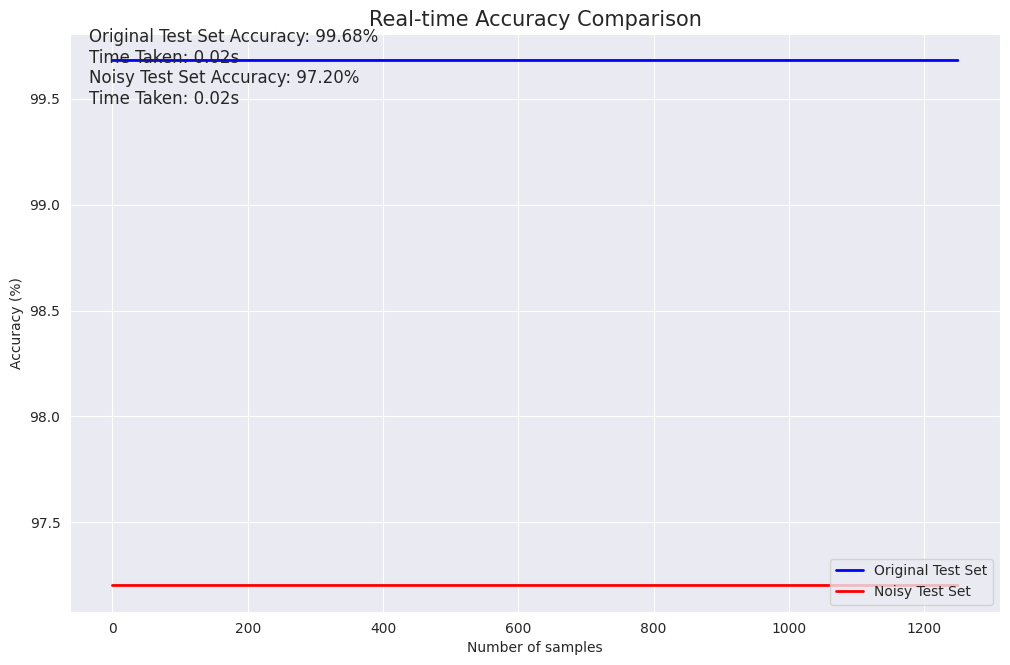

Making graph 0%, 10%, 20%, 30% Noise


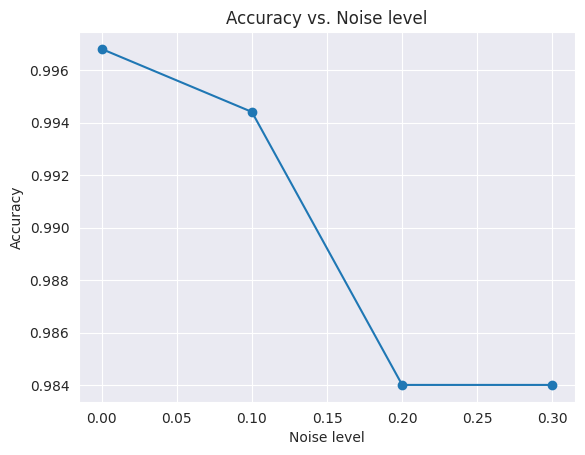

In [22]:

# Create a button for Check drift
check_drift_button = widgets.Button(description="Check drift", button_style="warning", layout=widgets.Layout(width='200px', height='50px'))
# Create a button for Induce drift
induce_drift_button = widgets.Button(description="Induce drift", button_style="danger", layout=widgets.Layout(width='200px', height='50px'))
# create a button for graph
graph = widgets.Button(description="graph", button_style="success", layout=widgets.Layout(width='200px', height='50px'))

# Arrange the buttons horizontally
buttons_layout = widgets.Layout(display='flex', flex_flow='row', justify_content='center')

# Create an HBox to hold the buttons
buttons_container = widgets.HBox([check_drift_button, induce_drift_button, graph], layout=buttons_layout)

# Function to handle the button clicks
def on_button_click(button):
    if button.description == "Check drift":
        # Call the function for checking drift
        check_drift()
    elif button.description == "Induce drift":
        # Call the function for inducing drift with slider
        induce_drift_with_slider()
    elif button.description == "graph":
        # Call the function for inducing drift with slider
        make_graph()

# Function for checking drift
def check_drift():
    # Implement the logic for checking drift
    print("Checking drift...")
    # Create a progress bar widget
    progress_bar = tqdm(total=10, desc="Checking drift", bar_format="{l_bar}{bar}| {n_fmt}/{total_fmt}")
    # Simulate the drift check process
    # Simulate the drift check process
    %run Data_Drift_Detection.ipynb
    print("Process Completed")

# Function for inducing drift with slider
def induce_drift_with_slider():
    # Create a slider for selecting the percentage of drift
    drift_slider = widgets.SelectionSlider(options=[10, 20, 30, 40], description="Drift Percentage:", continuous_update=False)

    # Create a button for confirming the drift percentage
    confirm_button = widgets.Button(description="Confirm", button_style="success")

    # Function to handle the confirm button click
    def confirm_button_click(_):
        # Get the selected drift percentage from the slider
        drift_percentage = drift_slider.value

        # Implement the logic for inducing drift with the selected percentage
        print(f"Inducing drift with {drift_percentage}%...")

        %run Induce_drift.ipynb
        InduceDrift(drift_percentage/100)

    # Assign the confirm button click event handler
    confirm_button.on_click(confirm_button_click)

    # Create a VBox to hold the slider and confirm button
    drift_container = widgets.VBox([drift_slider, confirm_button])

    # Display the drift container
    display(drift_container)

# Function for making graph
def make_graph():
    # Implement the logic for graph
    print("Making graph 0%, 10%, 20%, 30% Noise")
    %run Drift_graph.ipynb


# Assign the button click event handler
check_drift_button.on_click(on_button_click)
induce_drift_button.on_click(on_button_click)
graph.on_click(on_button_click)

# Display the buttons container
display(buttons_container)
